<a href="https://colab.research.google.com/github/shahazadkbz/CarPricePredictor/blob/main/CarPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [49]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")

In [50]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [53]:
df.drop(["car_ID"], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [54]:
df.isnull().sum()

,0
symboling,0
wheelbase,0
carlength,0
carwidth,0
carheight,0
...,...
fuelsystem_idi,0
fuelsystem_mfi,0
fuelsystem_mpfi,0
fuelsystem_spdi,0


Text(0.5, 1.0, 'Car Price Distribution')

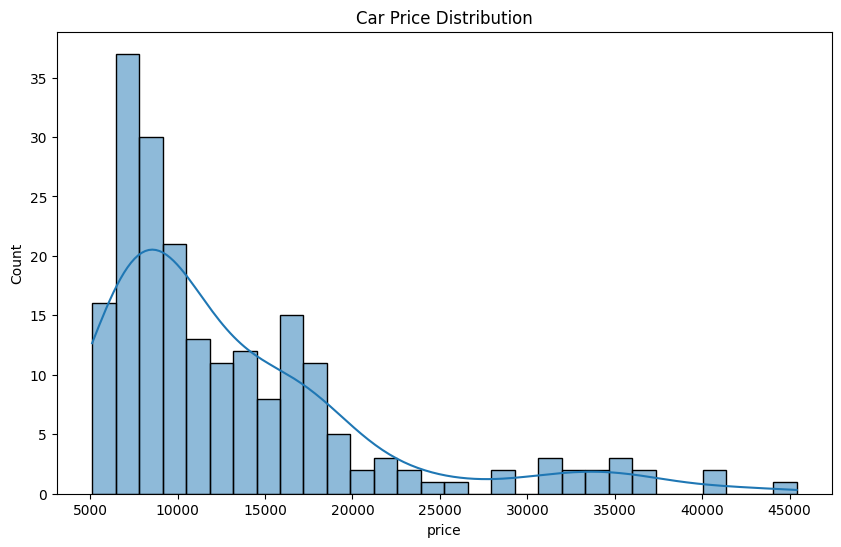

In [55]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Car Price Distribution")




<Axes: >

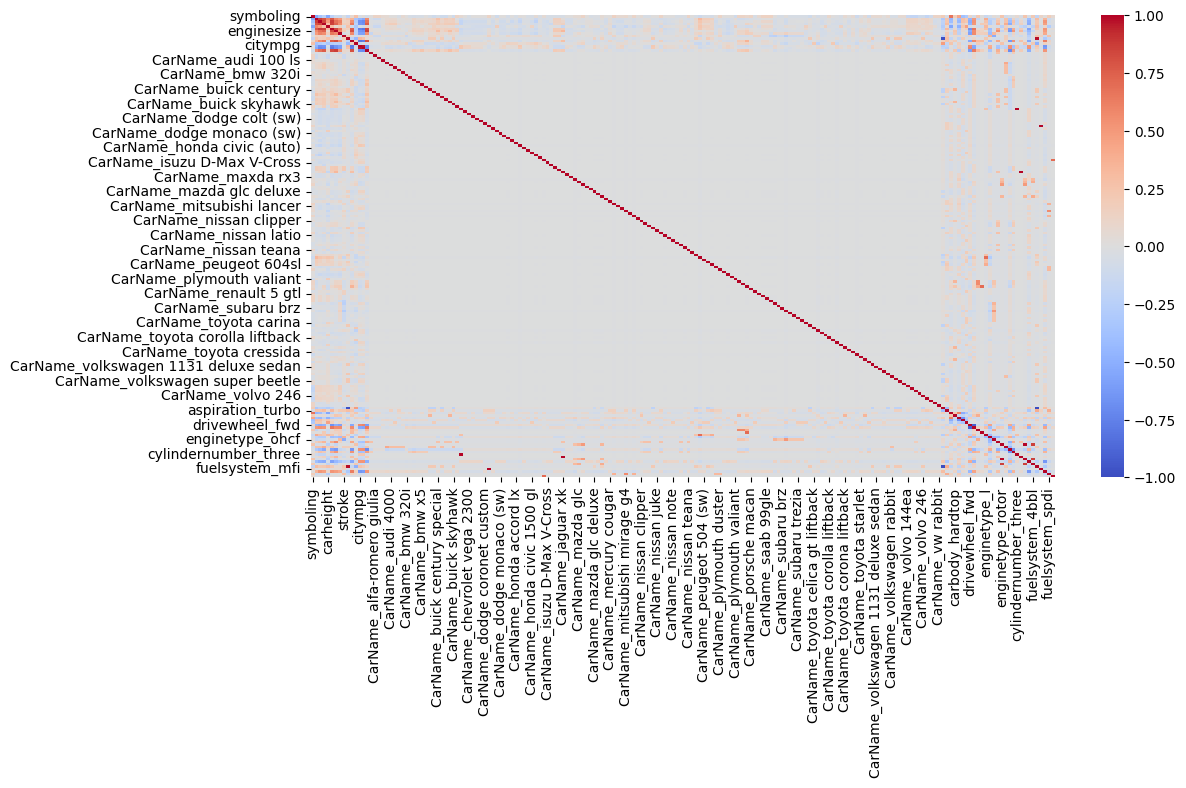

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)

In [57]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
X_train

array([[-0.72738032,  1.03708546,  0.07244984, ..., -0.95235327,
        -0.19487094, -0.07832604],
       [-0.72738032,  1.54123134,  1.04391556, ...,  1.05003052,
        -0.19487094, -0.07832604],
       [-0.72738032, -0.50896191, -0.36761583, ..., -0.95235327,
        -0.19487094, -0.07832604],
       ...,
       [ 0.07863571, -0.71062026, -0.73295337, ..., -0.95235327,
        -0.19487094, -0.07832604],
       [ 1.69066776,  0.70098821,  0.77821554, ...,  1.05003052,
        -0.19487094, -0.07832604],
       [-0.72738032,  0.28086664,  0.86954992, ...,  1.05003052,
        -0.19487094, -0.07832604]])

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Results
MAE: 4160.851580227413
RMSE: 6329.903515195974
R2 Score: 0.49245455114619074


In [61]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Results")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Decision Tree Results
MAE: 2200.1422682926827
RMSE: 3372.834952011362
R2 Score: 0.855897691975291


In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Random Forest Results
MAE: 1363.5695853658538
RMSE: 1915.6769671452198
R2 Score: 0.9535136644731463


In [63]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print("Support Vector Regressor Results")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Support Vector Regressor Results
MAE: 5705.033285012664
RMSE: 9325.947941729735
R2 Score: -0.10170857834104075


In [64]:
# Store all results
results = {
    "Linear Regression": [mean_absolute_error(y_test, lr.predict(X_test)),
                          np.sqrt(mean_squared_error(y_test, lr.predict(X_test))),
                          r2_score(y_test, lr.predict(X_test))],

    "Decision Tree": [mean_absolute_error(y_test, dt.predict(X_test)),
                      np.sqrt(mean_squared_error(y_test, dt.predict(X_test))),
                      r2_score(y_test, dt.predict(X_test))],

    "Random Forest": [mean_absolute_error(y_test, rf.predict(X_test)),
                      np.sqrt(mean_squared_error(y_test, rf.predict(X_test))),
                      r2_score(y_test, rf.predict(X_test))],


    "SVR": [mean_absolute_error(y_test, svr.predict(X_test)),
            np.sqrt(mean_squared_error(y_test, svr.predict(X_test))),
            r2_score(y_test, svr.predict(X_test))]
}

# Convert to DataFrame
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R2"]).T  # T = transpose
results_df = results_df.sort_values(by="R2", ascending=False)      # Sort by best R2
results_df


,MAE,RMSE,R2
Random Forest,1363.569585,1915.676967,0.953514
Decision Tree,2200.142268,3372.834952,0.855898
Linear Regression,4160.851580,6329.903515,0.492455
SVR,5705.033285,9325.947942,-0.101709


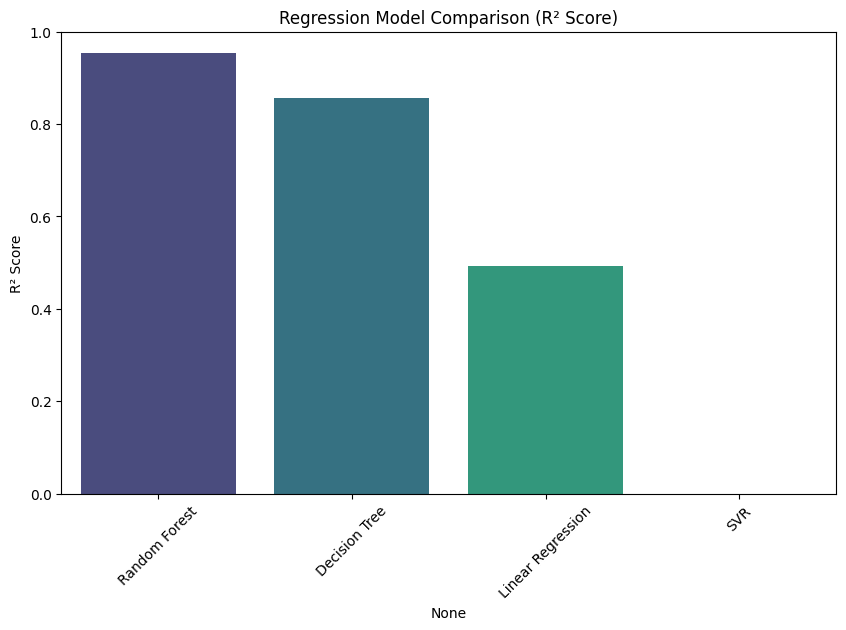

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Regression Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.show()
